![](https://occupy.com/sites/default/files/medialibrary/Microgrid-The-Post-Microgrid-Distribution-System-1.gif)

# About Dataset

> *Power System Attack Datasets - Mississippi State University and Oak Ridge National Laboratory - 4/15/2014.
There are three datasets contained in this folder. They are made from one initial dataset consisting of fifteen sets with 37 power system event scenarios in each. The multiclass datasets are in ARFF format for easy use with Weka and the others are in CSV format also compatible with Weka. The 37 scenarios are divided into Natural Events (8), No Events (1) and Attack Events (28). The datasets were randomly sampled at one percent and grouped into:*

> - Binary
> - Three-class and
> - Multiclass datasets.

> **The figure below shows the power system framework configuration used in generating these scenarios. In the network diagram we have several components; firstly, G1 and G2 are power generators. R1 through R4 are Intelligent Electronic Devices (IEDs) that can switch the breakers on or off. These breakers are labeled BR1 through BR4. We also have two lines. Line One spans from breaker one (BR1) to breaker two (BR2) and Line Two spans from breaker three (BR3) to breaker four (BR4). Each IED automatically controls one breaker. R1 controls BR1, R2 controls BR2 and son on accordingly. The IEDs use a distance protection scheme which trips the breaker on detected faults whether actually valid or faked since they have no internal validation to detect the difference. Operators can also manually issue commands to the IEDs R1 through R4 to manually trip the breakers BR1 through BR4. The manual override is used when performing maintenance on the lines or other system components.**

## *Types of Scenarios:*
1. Short-circuit fault – this is a short in a power line and can occur in various locations along the line, the location is indicated by the percentage range.
2. Line maintenance –one or more relays are disabled on a specific line to do maintenance for that line.
3. Remote tripping command injection (Attack) – this is an attack that sends a command to a relay which causes a breaker to open. It can only be done once an attacker has penetrated outside defenses.
4. Relay setting change (Attack) – relays are configured with a distance protection scheme and the attacker changes the setting to disable the relay function such that relay will not trip for a valid fault or a valid command.
5. Data Injection (Attack) – here we imitate a valid fault by changing values to parameters such as current, voltage, sequence components etc. This attack aims to blind the operator and causes a black out.

In [97]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [98]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

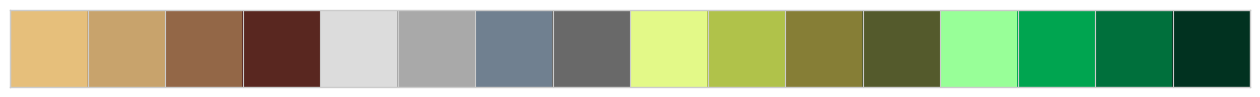

In [99]:
colors = [
    "#e6bf7b", "#c8a36c", "#936747", "#592720", "#dcdcdc", "#a9a9a9",
    "#708090", "#696969", "#e3f988", "#b0c24a", "#867e36", "#545a2c",
    "#98ff98", "#00a550", "#00703c", "#013220"
]
sns.palplot(sns.color_palette(colors))

In [100]:
df= pd.read_csv('D:/Smart Grid Intrusion Detection/binaryAllNaturalPlusNormalVsAttacks/data1.csv')

In [101]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

df.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,6.391383,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532104,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,6.130100,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,6.111440,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,8.185463,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128354.7578,-114.925241,489.349365,122.148740,505.754456,5.468445,487.335205,66.085509,128251.6250,0.0,0.0,0.0,0.0,-115.787662,493.978516,-59.669496,10.797501,72.424621,10.808945,60.005001,0.00,7.924891,-3.136669,0,66.062034,127823.5305,-53.909599,127798.4572,-173.892691,127848.6037,-115.124410,487.07260,122.125954,502.08762,5.259753,484.32595,66.090682,127823.5305,0.0,0.0,0.0,0.0,-115.932280,491.10102,-60.172028,10.25416,73.533403,10.07105,60.005,0.00,7.898427,-3.131062,0,73.745398,130330.8575,-46.249153,129704.0257,-166.232245,130381.0040,71.837448,481.76241,-50.792709,496.04499,-167.618803,477.73399,73.756857,130130.2713,0.0,0.0,0.0,0.0,71.121251,485.05839,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,8.141328,0.027210,0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,-167.441186,481.02997,73.751127,130330.8575,0.0,0.0,0.0,0.0,71.132710,488.35437,125.007932,10.62038,-94.520847,11.35282,60.005,0.00,8.190006,0.027904,0,66.112980,128283.9453,-53.852234,128144.4688,-173.883366,128382.9609,-114.919736,488.885864,122.214665,505.531311,5.462952,487.627014,66.129454,128269.5938,0.0,0.0,0.0,0.0,-115.765696,493.852600,-58.653259,10.396957,72.177430,10.768890,60.005001,0.00,7.931677,-3.136360,0,66.119330,127823.5305,-53.863762,127798

In [102]:
X = df.drop('marker',axis=1)
y = df['marker']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

In [103]:
df['marker'].value_counts()

marker
Attack     3610
Natural    1008
Name: count, dtype: int64

In [104]:
for col in df[['R1:S','R2:S','R3:S','R4:S']]:
    print(f"\033[031m\033[1m",col,":")
    print(f"\033[034m\033[1m",df[col].value_counts())
    print(f"\033[035m\033[1m","==="*10)

 R1:S :
 R1:S
0       4605
2058       9
2056       2
2048       2
Name: count, dtype: int64
 R2:S :
 R2:S
0    4618
Name: count, dtype: int64
 R3:S :
 R3:S
0    4618
Name: count, dtype: int64
 R4:S :
 R4:S
0       4613
2058       5
Name: count, dtype: int64


In [105]:
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,6.391383,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532104,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,6.130100,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,6.111440,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,8.185463,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128354.7578,-114.925241,489.349365,122.148740,505.754456,5.468445,487.335205,66.085509,128251.6250,0.0,0.0,0.0,0.0,-115.787662,493.978516,-59.669496,10.797501,72.424621,10.808945,60.005001,0.00,7.924891,-3.136669,0,66.062034,127823.5305,-53.909599,127798.4572,-173.892691,127848.6037,-115.124410,487.07260,122.125954,502.08762,5.259753,484.32595,66.090682,127823.5305,0.0,0.0,0.0,0.0,-115.932280,491.10102,-60.172028,10.25416,73.533403,10.07105,60.005,0.00,7.898427,-3.131062,0,73.745398,130330.8575,-46.249153,129704.0257,-166.232245,130381.0040,71.837448,481.76241,-50.792709,496.04499,-167.618803,477.73399,73.756857,130130.2713,0.0,0.0,0.0,0.0,71.121251,485.05839,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,8.141328,0.027210,0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,-167.441186,481.02997,73.751127,130330.8575,0.0,0.0,0.0,0.0,71.132710,488.35437,125.007932,10.62038,-94.520847,11.35282,60.005,0.00,8.190006,0.027904,0,66.112980,128283.9453,-53.852234,128144.4688,-173.883366,128382.9609,-114.919736,488.885864,122.214665,505.531311,5.462952,487.627014,66.129454,128269.5938,0.0,0.0,0.0,0.0,-115.765696,493.852600,-58.653259,10.396957,72.177430,10.768890,60.005001,0.00,7.931677,-3.136360,0,66.119330,127823.5305,-53.863762,127798

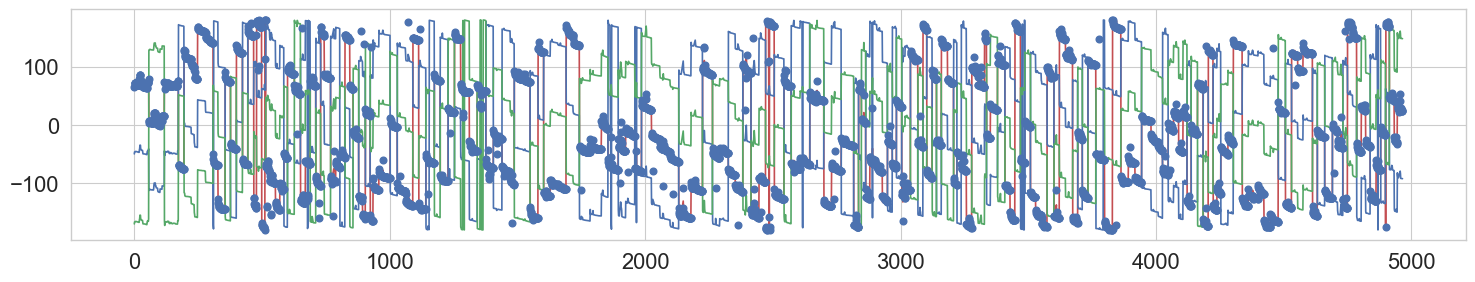

In [106]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(df["R1-PA1:VH"],'r')
ax = plt.plot(df["R1-PA2:VH"],'b')
ax = plt.plot(df["R1-PA3:VH"],'g')
ax = plt.plot(df["R1-PA4:IH"],'o');

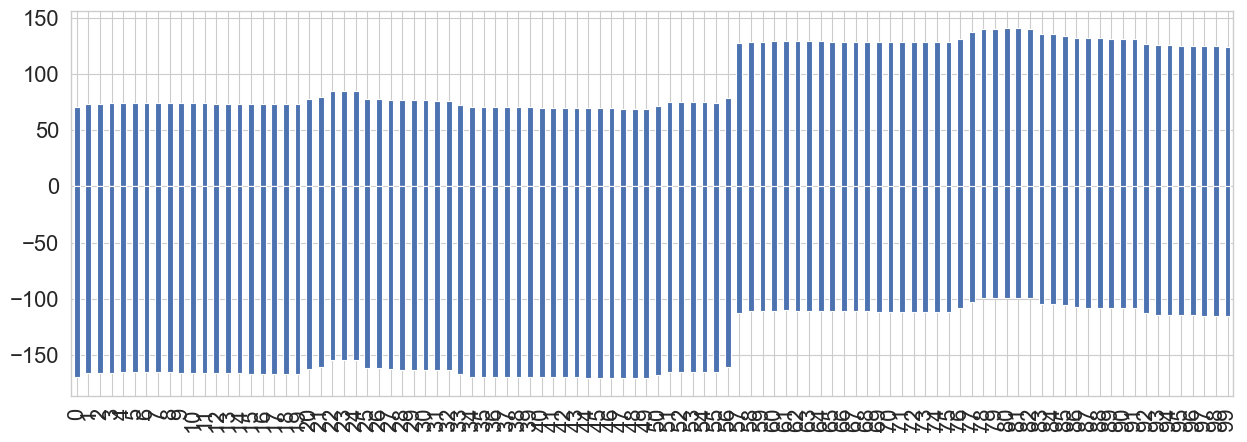

In [107]:
df["R1-PA1:VH"][:100].plot(kind="bar",figsize=(15,5))
df["R1-PA2:VH"][:100].plot(kind="bar",figsize=(15,5))
df["R1-PA3:VH"][:100].plot(kind="bar",figsize=(15,5))
plt.show()

In [108]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['marker'] = encoder.fit_transform(df['marker'])
df.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,6.391383,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532104,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,6.130100,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,6.111440,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,8.185463,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128354.7578,-114.925241,489.349365,122.148740,505.754456,5.468445,487.335205,66.085509,128251.6250,0.0,0.0,0.0,0.0,-115.787662,493.978516,-59.669496,10.797501,72.424621,10.808945,60.005001,0.00,7.924891,-3.136669,0,66.062034,127823.5305,-53.909599,127798.4572,-173.892691,127848.6037,-115.124410,487.07260,122.125954,502.08762,5.259753,484.32595,66.090682,127823.5305,0.0,0.0,0.0,0.0,-115.932280,491.10102,-60.172028,10.25416,73.533403,10.07105,60.005,0.00,7.898427,-3.131062,0,73.745398,130330.8575,-46.249153,129704.0257,-166.232245,130381.0040,71.837448,481.76241,-50.792709,496.04499,-167.618803,477.73399,73.756857,130130.2713,0.0,0.0,0.0,0.0,71.121251,485.05839,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,8.141328,0.027210,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,-167.441186,481.02997,73.751127,130330.8575,0.0,0.0,0.0,0.0,71.132710,488.35437,125.007932,10.62038,-94.520847,11.35282,60.005,0.00,8.190006,0.027904,0,66.112980,128283.9453,-53.852234,128144.4688,-173.883366,128382.9609,-114.919736,488.885864,122.214665,505.531311,5.462952,487.627014,66.129454,128269.5938,0.0,0.0,0.0,0.0,-115.765696,493.852600,-58.653259,10.396957,72.177430,10.768890,60.005001,0.00,7.931677,-3.136360,0,66.119330,127823.5305,-53.863762,127798.4572,-173.8

In [109]:
X = df.drop('marker',axis=1)
y = df['marker']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

<font color="lightseagreen" size=+2.5><b>XGBClassifier</b></font>

 Train set score: 1.00
 Accuracy Score : 0.96
 Precision Score: 0.91
 Recall Score   : 0.91
 f1 Score       : 0.91 

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       726
           1       0.91      0.91      0.91       198

    accuracy                           0.96       924
   macro avg       0.94      0.94      0.94       924
weighted avg       0.96      0.96      0.96       924
 

 Confusion Matrix:
 [[708  18]
 [ 17 181]]


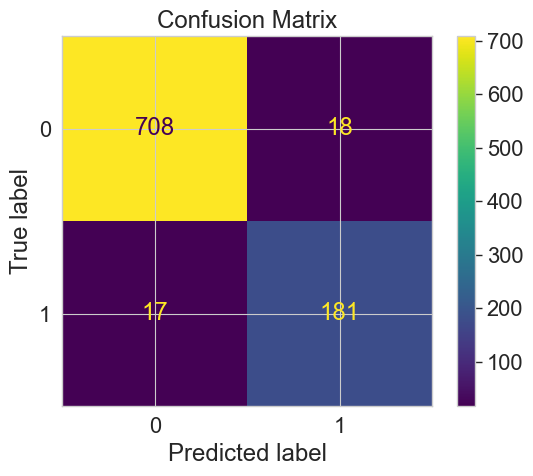

In [110]:
# XGBClassifier
from xgboost import XGBClassifier

XGBClassifier = XGBClassifier()
XGBClassifier.fit(X_train, y_train)
y_pred_XGBClassifier = XGBClassifier.predict(X_test)
acc_XGBClassifier = round(accuracy_score(y_test,y_pred_XGBClassifier)*100,2)
ac_xg=accuracy_score(y_test,y_pred_XGBClassifier)*100
print(f"\033[031m\033[1m","Train set score: {:.2f}".format(XGBClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_XGBClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_XGBClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_XGBClassifier))
cm = confusion_matrix(y_test,y_pred_XGBClassifier)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBClassifier.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

<font color="lightseagreen" size=+2.5><b>Random Forest Classifier</b></font>

 Train set score: 1.00
 Accuracy Score : 0.97
 Precision Score: 0.95
 Recall Score   : 0.90
 f1 Score       : 0.93 

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       726
           1       0.95      0.90      0.93       198

    accuracy                           0.97       924
   macro avg       0.96      0.95      0.95       924
weighted avg       0.97      0.97      0.97       924
 

 Confusion Matrix:
 [[717   9]
 [ 19 179]]


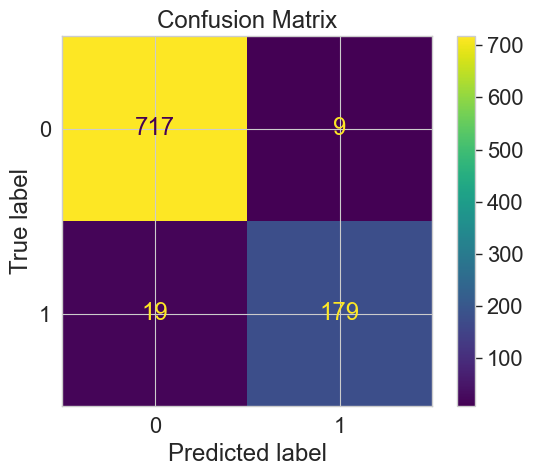

In [127]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier = RandomForestClassifier(n_estimators=100)
RandomForestClassifier.fit(X_train, y_train)
y_pred_RandomForestClassifier = RandomForestClassifier.predict(X_test)
acc_RandomForestClassifier = round(accuracy_score(y_test,y_pred_RandomForestClassifier)*100,2)
ac_rf=accuracy_score(y_test,y_pred_RandomForestClassifier)*100
print(f"\033[031m\033[1m","Train set score: {:.2f}".format(RandomForestClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_RandomForestClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_RandomForestClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_RandomForestClassifier))
cm = confusion_matrix(y_test,y_pred_RandomForestClassifier)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RandomForestClassifier.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

<font color="lightseagreen" size=+2.5><b>BaggingClassifier</b></font>

 Train set score: 1.00
 Accuracy Score : 0.96
 Precision Score: 0.94
 Recall Score   : 0.88
 f1 Score       : 0.91 

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       726
           1       0.94      0.88      0.91       198

    accuracy                           0.96       924
   macro avg       0.95      0.93      0.94       924
weighted avg       0.96      0.96      0.96       924
 

 Confusion Matrix:
 [[714  12]
 [ 24 174]]


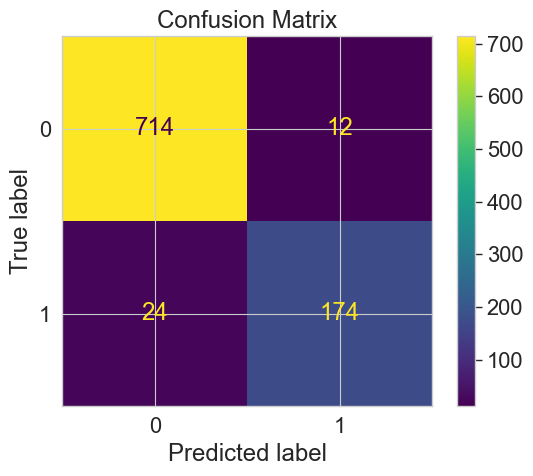

In [112]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
BaggingClassifier = BaggingClassifier()
BaggingClassifier.fit(X_train, y_train)
y_pred_BaggingClassifier = BaggingClassifier.predict(X_test)
acc_BaggingClassifier = round(accuracy_score(y_test,y_pred_BaggingClassifier)*100,2)
ac_bg=accuracy_score(y_test,y_pred_BaggingClassifier)*100
print(f"\033[031m\033[1m","Train set score: {:.2f}".format(BaggingClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_BaggingClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_BaggingClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_BaggingClassifier))
cm = confusion_matrix(y_test,y_pred_BaggingClassifier)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=BaggingClassifier.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

<font color="lightseagreen" size=+2.5><b>LogisticRegressionClassifier</b></font>

 Train set score: 0.77
 Accuracy Score : 0.77
 Precision Score: 0.38
 Recall Score   : 0.15
 f1 Score       : 0.21 

 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86       726
           1       0.38      0.15      0.21       198

    accuracy                           0.77       924
   macro avg       0.59      0.54      0.54       924
weighted avg       0.71      0.77      0.72       924
 

 Confusion Matrix:
 [[679  47]
 [169  29]]


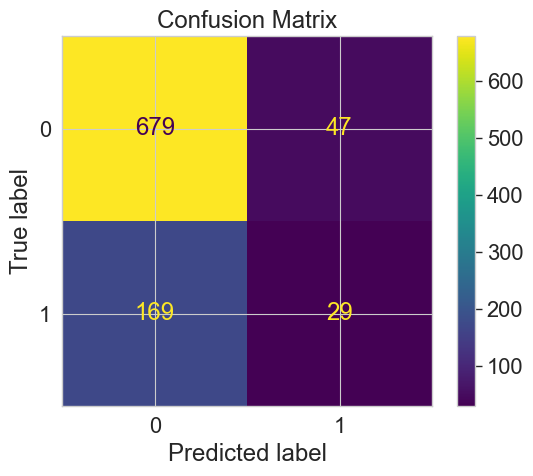

In [113]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train)
y_pred_LogisticRegression = LogisticRegression.predict(X_test)
acc_LogisticRegression = round(accuracy_score(y_test,y_pred_LogisticRegression)*100,2)
ac_lr=accuracy_score(y_test,y_pred_LogisticRegression)*100
print(f"\033[031m\033[1m","Train set score: {:.2f}".format(LogisticRegression.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_LogisticRegression)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_LogisticRegression),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_LogisticRegression))
cm = confusion_matrix(y_test,y_pred_LogisticRegression)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LogisticRegression.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

<font color="lightseagreen" size=+2.5><b>Decision Tree</font>

Train set score: 1.00
Accuracy Score : 0.95
Precision Score: 0.86
Recall Score   : 0.90
f1 Score       : 0.88 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       726
           1       0.86      0.90      0.88       198

    accuracy                           0.95       924
   macro avg       0.92      0.93      0.93       924
weighted avg       0.95      0.95      0.95       924
 

Confusion Matrix:
 [[698  28]
 [ 19 179]]


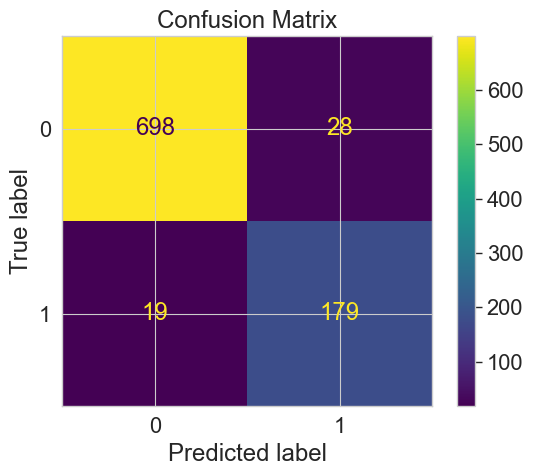

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier
decision_tree_classifier.fit(X_train, y_train)

# Make predictions
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy_decision_tree = round(accuracy_score(y_test, y_pred_decision_tree) * 100,2)
ac_dt=accuracy_score(y_test, y_pred_decision_tree)*100

# Calculate individual metric scores
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_score_decision_tree = f1_score(y_test, y_pred_decision_tree)

print("\033[031m\033[1mTrain set score: {:.2f}".format(decision_tree_classifier.score(X_train, y_train)))
print("\033[031m\033[1mAccuracy Score : {:.2f}".format(accuracy_score(y_test, y_pred_decision_tree)))
print("\033[031m\033[1mPrecision Score: {:.2f}".format(precision_decision_tree))
print("\033[031m\033[1mRecall Score   : {:.2f}".format(recall_decision_tree))
print("\033[031m\033[1mf1 Score       : {:.2f}".format(f1_score_decision_tree), '\n')

# Print classification report
print("\033[032m\033[1mClassification Report:\n", classification_report(y_test, y_pred_decision_tree), '\n')

# Print confusion matrix
print("\033[034m\033[1mConfusion Matrix:\n", confusion_matrix(y_test, y_pred_decision_tree))

# Display the confusion matrix
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
disp_decision_tree = ConfusionMatrixDisplay(confusion_matrix=cm_decision_tree, display_labels=decision_tree_classifier.classes_)
disp_decision_tree.plot()
plt.title('Confusion Matrix')
plt.show()


<font color="lightseagreen" size=+2.5><b>SVC</b></font>

Train set score: 0.78
Accuracy Score : 0.79
Precision Score: 0.00
Recall Score   : 0.00
f1 Score       : 0.00 

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       726
           1       0.00      0.00      0.00       198

    accuracy                           0.79       924
   macro avg       0.39      0.50      0.44       924
weighted avg       0.62      0.79      0.69       924
 

Confusion Matrix:
 [[726   0]
 [198   0]]


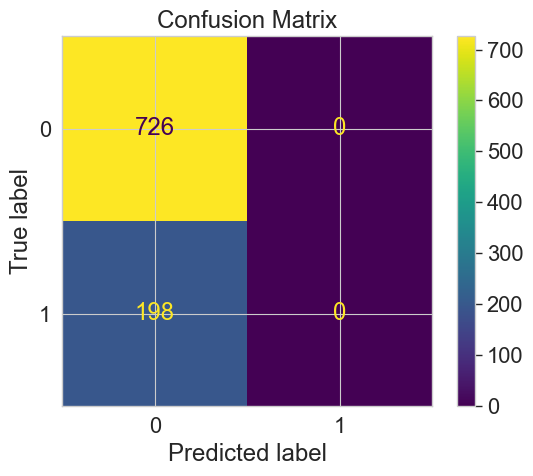

In [115]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create an SVM Classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
ac_svm=accuracy_svm*100

# Calculate individual metric scores
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)

print("\033[031m\033[1mTrain set score: {:.2f}".format(svm_classifier.score(X_train, y_train)))
print("\033[031m\033[1mAccuracy Score : {:.2f}".format(accuracy_svm))
print("\033[031m\033[1mPrecision Score: {:.2f}".format(precision_svm))
print("\033[031m\033[1mRecall Score   : {:.2f}".format(recall_svm))
print("\033[031m\033[1mf1 Score       : {:.2f}".format(f1_score_svm), '\n')

# Print classification report
print("\033[032m\033[1mClassification Report:\n", classification_report(y_test, y_pred_svm), '\n')

# Print confusion matrix
print("\033[034m\033[1mConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Display the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_classifier.classes_)
disp_svm.plot()
plt.title('Confusion Matrix')
plt.show()


<font color="lightseagreen" size=+2.5><b>KNN</b></font>

Train set score: 0.93
Accuracy Score : 0.89
Precision Score: 0.73
Recall Score   : 0.79
f1 Score       : 0.76 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       726
           1       0.73      0.79      0.76       198

    accuracy                           0.89       924
   macro avg       0.84      0.85      0.85       924
weighted avg       0.90      0.89      0.89       924
 

Confusion Matrix:
 [[669  57]
 [ 42 156]]


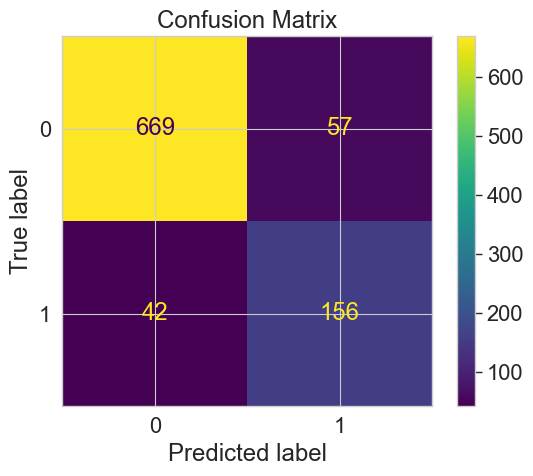

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a KNN Classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Calculate individual metric scores
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)
ac_knn=accuracy_knn*100

print("\033[031m\033[1mTrain set score: {:.2f}".format(knn_classifier.score(X_train, y_train)))
print("\033[031m\033[1mAccuracy Score : {:.2f}".format(accuracy_knn))
print("\033[031m\033[1mPrecision Score: {:.2f}".format(precision_knn))
print("\033[031m\033[1mRecall Score   : {:.2f}".format(recall_knn))
print("\033[031m\033[1mf1 Score       : {:.2f}".format(f1_score_knn), '\n')

# Print classification report
print("\033[032m\033[1mClassification Report:\n", classification_report(y_test, y_pred_knn), '\n')

# Print confusion matrix
print("\033[034m\033[1mConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Display the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_classifier.classes_)
disp_knn.plot()
plt.title('Confusion Matrix')
plt.show()


## Voting Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100,random_state=42)
svm_clf = SVC(max_iter=100,tol=20,random_state=42)
mlp_clf = MLPClassifier(random_state=42)

estimators = [rnd_clf,extra_trees_clf,svm_clf,mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train,y_train)

Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the SVC(max_iter=100, random_state=42, tol=20)
Training the MLPClassifier(random_state=42)


In [118]:
from sklearn.ensemble import VotingClassifier

named_estimators = [
    ("random_forest_clf",rnd_clf),
    ("Extra_trees_clf",extra_trees_clf),
    ("SVM",svm_clf),
    ("MLP",mlp_clf)
]

voting_clf = VotingClassifier(named_estimators)

print(voting_clf.fit(X_train,y_train))
print("voting_clf.score:",voting_clf.score(X_test,y_test))

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('Extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('SVM',
                              SVC(max_iter=100, random_state=42, tol=20)),
                             ('MLP', MLPClassifier(random_state=42))])
voting_clf.score: 0.9772727272727273


## Roc Auc Curve

In [119]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import log_loss

def cross_val(X, y, model, params, folds=9,lw=5):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400,
                eval_metric='mlogloss')

        pred = alg.predict_proba(x_test)
        loss = log_loss(y_test, pred)
        print(f"Log loss: {loss}")
        print("-"*50)
    
    return alg

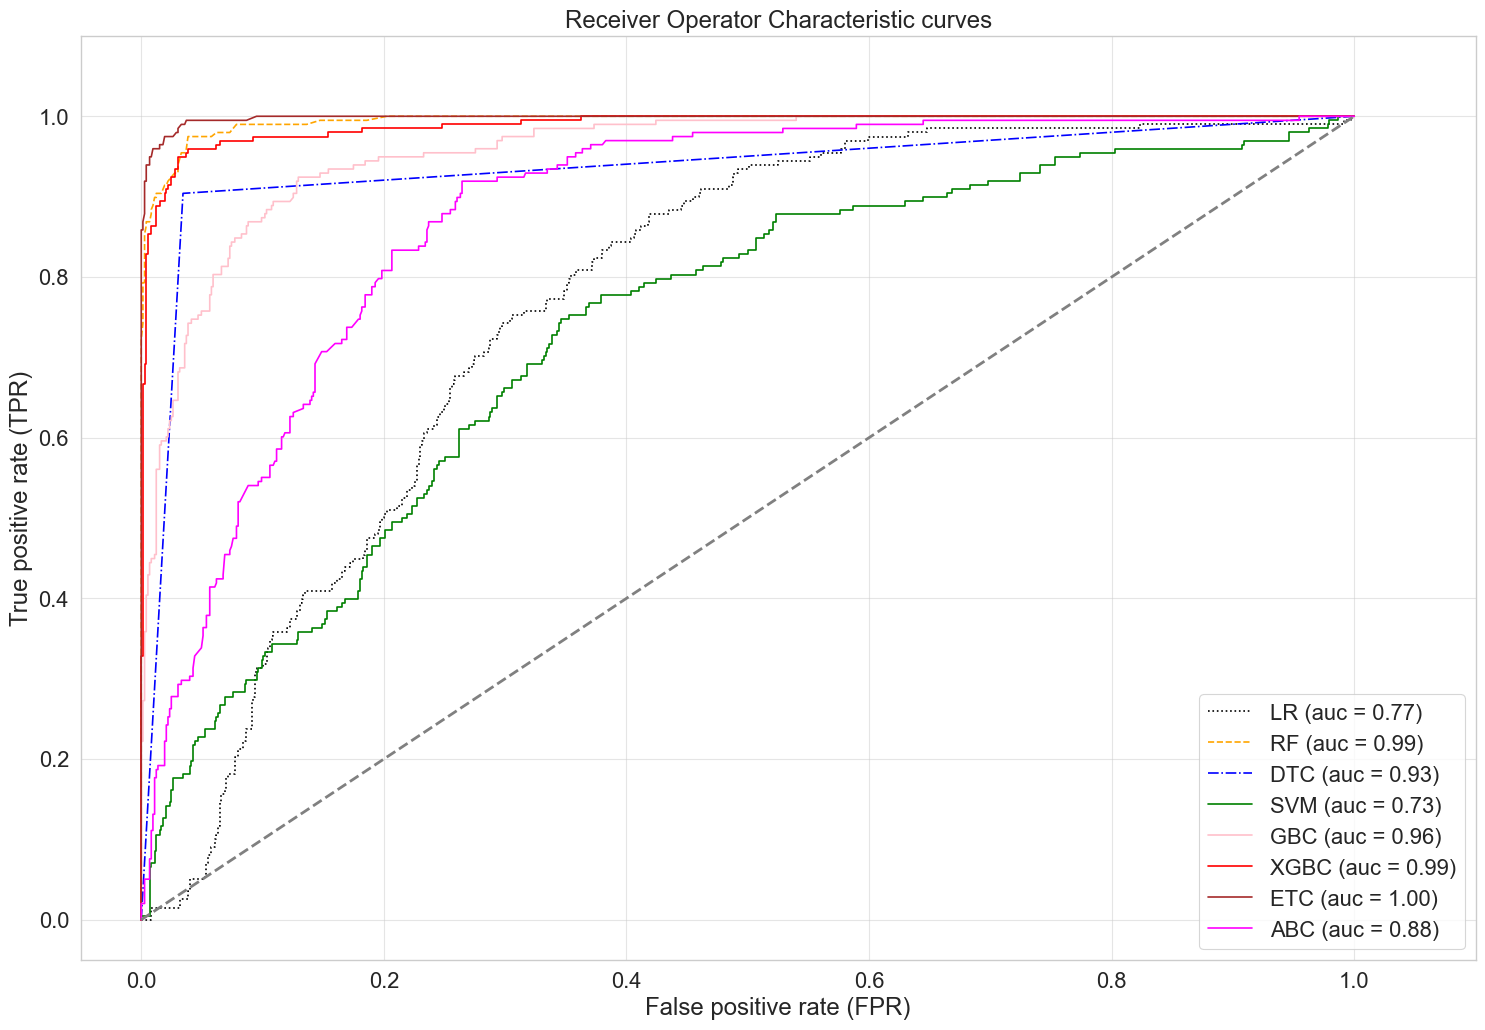

In [120]:
plt.figure(figsize=(18,12))
sns.set_theme(style="whitegrid")
sns.set_context('paper', font_scale=1.8)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

lr = LogisticRegression()
rf = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
xgbc = XGBClassifier()
svm = SVC(probability=True)
dtc = DecisionTreeClassifier()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


all_clf=[lr, rf,dtc,svm,gbc,xgbc,etc,abc]
clf_labels=["LR", "RF","DTC", "SVM","GBC","XGBC","ETC","ABC"]
colors =["black", "orange", "blue", "green","pink","red","Brown","Magenta"]
linestyles = [":","--", "-.","-","-","-","-","-"]

for clf, label,clr,ls in zip(all_clf, clf_labels, colors, linestyles):
  y_pred= clf.fit(X_train,y_train).predict_proba(X_test)[:,1]
  fpr,tpr,thresholds = roc_curve(y_true= y_test, y_score=y_pred)
  roc_auc= auc(x=fpr, y=tpr)
  plt.plot(fpr, tpr, color=clr, linestyle=ls,
           label='%s (auc = %0.2f)' % (label, roc_auc))
  
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--',color='gray',linewidth=2)
plt.xlim([-0.05,1.1])
plt.ylim([-0.05,1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver Operator Characteristic curves')
plt.show()

## Grid Search CV

### DecisionTreeClassifier

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold,StratifiedShuffleSplit

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

grid_dec = GridSearchCV(estimator=DecisionTreeClassifier(), 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_dec.fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [10, 20, 50, 100, 120]},
             scoring='accuracy', verbose=1)

In [122]:
print (grid_dec.best_score_)
print (grid_dec.best_params_)
print(grid_dec.best_estimator_)

0.8996753246753247
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10}
DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10)


In [123]:
decision_accuracy_grid = grid_dec.best_score_.round(5)
decision_accuracy_grid

0.89968

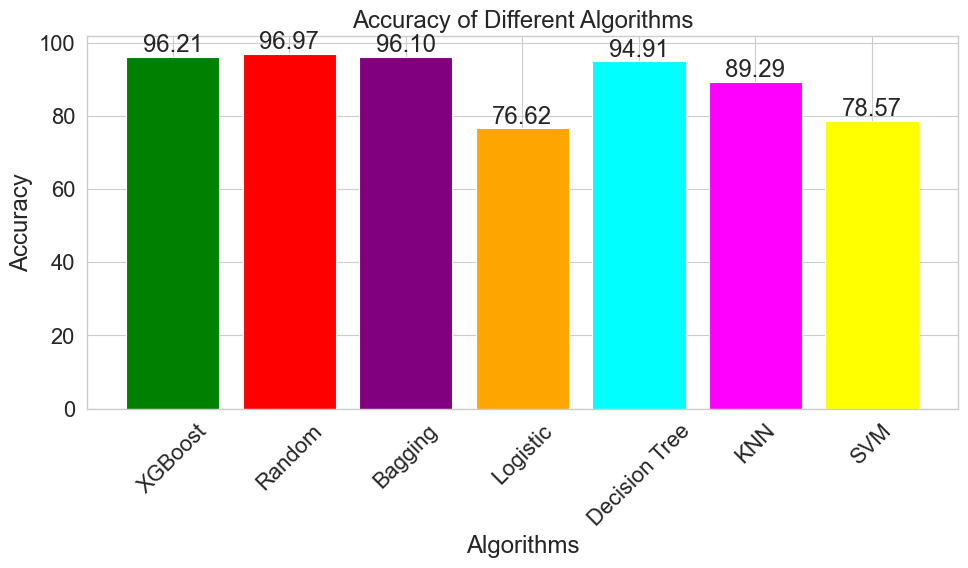

In [124]:
import matplotlib.pyplot as plt

# Define the algorithm names and their corresponding accuracy values
algorithms = ['XGBoost', 'Random', 'Bagging', 'Logistic', 'Decision Tree', 'KNN', 'SVM']
accuracy_values = [ac_xg, ac_rf, ac_bg, ac_lr, ac_dt, ac_knn, ac_svm]

# Set the figure size
plt.figure(figsize=(10, 6))

# Define colors for each bar
colors = ['green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow']

# Create the bar plot with specified colors
plt.bar(algorithms, accuracy_values, color=colors)

# Add text labels for each bar
for i in range(len(algorithms)):
    plt.text(i, accuracy_values[i], f"{accuracy_values[i]:.2f}", ha='center', va='bottom')

# Add labels and title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Algorithms")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


In [125]:
algorithms = ['XGBoost', 'Random Forest', 'Bagging', 'Logistic', 'Decision Tree', 'KNN', 'SVM']
accuracy_values = [ac_xg, ac_rf, ac_bg, ac_lr, ac_dt, ac_knn, ac_svm]

# Create a dictionary to map each algorithm to its accuracy value
accuracy_dict = dict(zip(algorithms, accuracy_values))

# Sort the dictionary by accuracy values in descending order
sorted_accuracy = sorted(accuracy_dict.items(), key=lambda x: x[1], reverse=True)

# Select the top two algorithms with the highest accuracy
best_algorithms = sorted_accuracy[:2]

print("Best two algorithms with the highest accuracy:")
for algorithm, accuracy in best_algorithms:
    print(f"{algorithm}: {accuracy}")


Best two algorithms with the highest accuracy:
Random Forest: 96.96969696969697
XGBoost: 96.21212121212122


Integrated Classifier Accuracy 97.5108
Accuracy Score :0.98


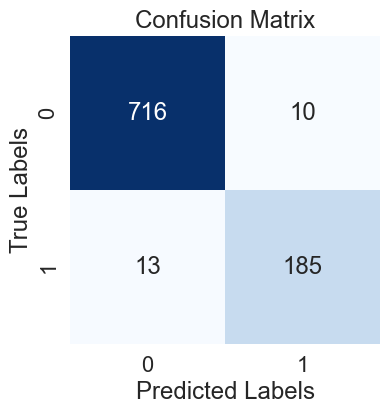

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       726
           1       0.95      0.93      0.94       198

    accuracy                           0.98       924
   macro avg       0.97      0.96      0.96       924
weighted avg       0.97      0.98      0.98       924



In [143]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Instantiate base classifiers
base_estimators = [
    ('extra_trees', ExtraTreesClassifier()),
    ('random_forest', RandomForestClassifier(n_estimators=100)),
    ('xgb', XGBClassifier())
]

# Instantiate meta classifier
meta_estimator = LogisticRegression()

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_estimator,
    stack_method='auto',
    cv=5,
    n_jobs=-1
)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict using the stacking classifier
y_pred_stacking = stacking_clf.predict(X_test)

# Calculate accuracy using Stacking classifier
acc_stacking = accuracy_score(y_test, y_pred_stacking)
ac_stacking=acc_stacking*100
print("\033[1mIntegrated Classifier Accuracy {:.4f}".format(ac_stacking))
print("Accuracy Score :{:.2f}".format(acc_stacking))
cm = confusion_matrix(y_test, y_pred_stacking)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_stacking))